In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC

In [3]:
data = (pd.read_csv('preprocess_data.csv')).to_numpy()

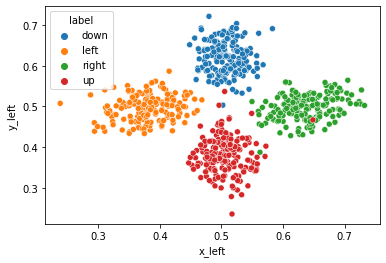

In [5]:
df = pd.read_csv('preprocess_data.csv')
import seaborn as sns 

sns.scatterplot(data=df,x='x_left',y='y_left',hue='label')
plt.savefig('tenth_division',dpi=400)

In [6]:
y=data[:,0]
x=data[:,1:]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
up=0
down=0
right=0
left=0
for label in y_train:
    if label == 'up':
            up+=1
    if label == 'down':
            down+=1
    if label == 'right':
            right+=1
    if label == 'left':
            left+=1

In [10]:
train_up =[]
train_down =[]
train_left =[]
train_right =[]
for idx,lables in enumerate(y_train):
    if lables=='up':
        train_up.append(x_train[idx])
    if lables=='down':
        train_down.append(x_train[idx])
    if lables=='left':
        train_left.append(x_train[idx])
    if lables=='right':
        train_right.append(x_train[idx])

In [11]:
avg_up= (np.array(train_up)).mean(axis=0)
avg_down= (np.array(train_down)).mean(axis=0)
avg_left= (np.array(train_left)).mean(axis=0)
avg_right= (np.array(train_right)).mean(axis=0)

In [12]:
correct=0
incorrect=0
for idx, t in enumerate(x_test):
    dist_up=np.linalg.norm(np.power(t-avg_up,2))
    dist_down=np.linalg.norm(np.power(t-avg_down,2))
    dist_left=np.linalg.norm(np.power(t-avg_left,2))
    dist_right=np.linalg.norm(np.power(t-avg_right,2))
    dist_arr=[dist_up,dist_down,dist_left,dist_right]
    l_arr=['up','down', 'left', 'right']
    min_d=np.argmin(dist_arr) 
    l=y_test[idx]
    if l == l_arr[min_d]:
        correct+=1
    else:
        incorrect+=1


In [13]:
score= correct/len(y_test)
score

0.9861111111111112

In [14]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(x_train, y_train)

SVC(gamma='auto')

In [15]:
clf.score(x_test,y_test)

0.9791666666666666

Final results

In [16]:
man = []
svm = []

score_full_man=0.9930555555555556
score_full_svm=0.9930555555555556

man.append(0.17482517482517482)
svm.append(0.2097902097902098)

man.append(0.20454545454545456)
svm.append(0.23484848484848486)

man.append(0.3)
svm.append(0.22142857142857142)

man.append(0.23943661971830985)
svm.append(0.19014084507042253)

man.append(0.2937062937062937)
svm.append(0.21678321678321677)

man.append(0.9929577464788732)
svm.append(0.9929577464788732)

man.append(1.0)
svm.append(1.0)

man.append(0.9859154929577465)
svm.append(0.9859154929577465)

man.append(0.9790209790209791)
svm.append(0.986013986013986)

man.append(0.951048951048951)
svm.append(0.951048951048951)

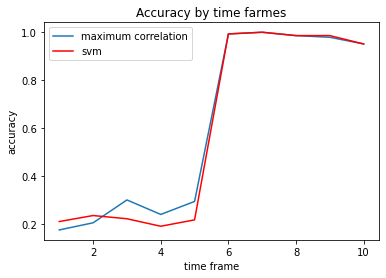

In [17]:
x = [i for i in range(1, 11)]
plt.plot(x, man)
plt.plot(x, svm, color='red')
plt.xlabel('time frame')
plt.ylabel('accuracy')
plt.title("Accuracy by time farmes")
plt.legend(['maximum correlation', 'svm'])
plt.savefig('coherence',dpi=400)